## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

##Linear regression

In [2]:
# 讀取波士頓房價資料集
boston = datasets.load_boston()

In [3]:
#sklearn讀欄位使用feature_names
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#data及target讀進來
X = boston.data
Y = boston.target

In [6]:
len(X)

506

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 87) #random_state希望每次訓練都取不同


In [8]:
regr = linear_model.LinearRegression()

In [9]:
regr.fit(x_train, y_train) #只能放訓練資料 train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
y_pred = regr.predict(x_test) #predict做預測

Text(0, 0.5, 'Predicted Price')

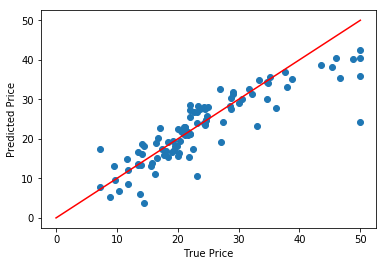

In [11]:
plt.scatter(y_test, y_pred)
plt.plot([0,50], [0,50],'r' )
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

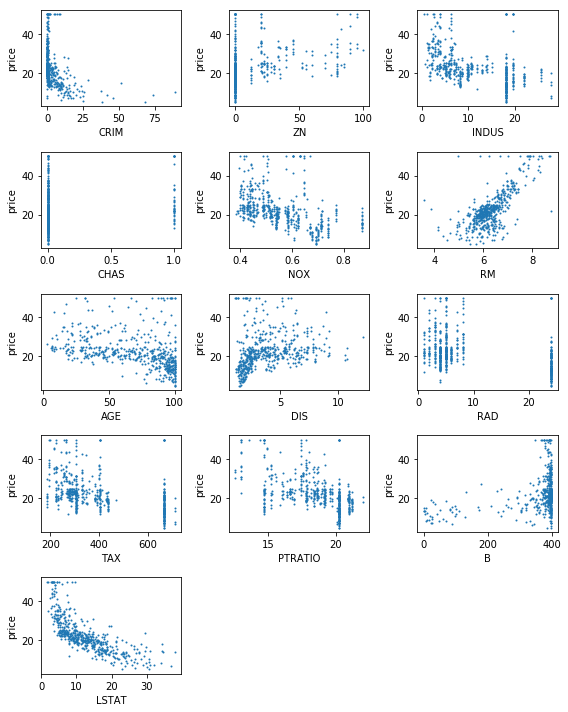

In [12]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(boston.feature_names):
  plt.subplot(5,3, i+1)
  plt.scatter(X[:, i], Y, s=1)
  plt.ylabel("price")
  plt.xlabel(feature)
  plt.tight_layout()

In [13]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-1.24433974e-01  4.36294774e-02  7.08477039e-03  3.32155669e+00
 -1.62508088e+01  3.79375366e+00 -8.47429239e-03 -1.39955608e+00
  2.97193303e-01 -1.12646278e-02 -9.18104130e-01  8.10701503e-03
 -5.06827327e-01]
Mean squared error: 25.98


In [16]:
s1 = X[:, 0] #X[範圍, 第幾個元素]
s1[:10]

array([0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,
       0.14455, 0.21124, 0.17004])

In [27]:
sub = X[:, np.newaxis, [0,5]] #取部分欄位, [0,5]: CRIM, RM

In [28]:
sub[:5]

array([[[6.320e-03, 6.575e+00]],

       [[2.731e-02, 6.421e+00]],

       [[2.729e-02, 7.185e+00]],

       [[3.237e-02, 6.998e+00]],

       [[6.905e-02, 7.147e+00]]])

### Logistics regression-1

In [18]:
wine = datasets.load_wine()

In [19]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [22]:
#data讀進來
X1 = wine.data
len(X1)

178

In [25]:
#target讀進來
Y1 = wine.target
Y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [29]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

C:\Users\tthcy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tthcy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444


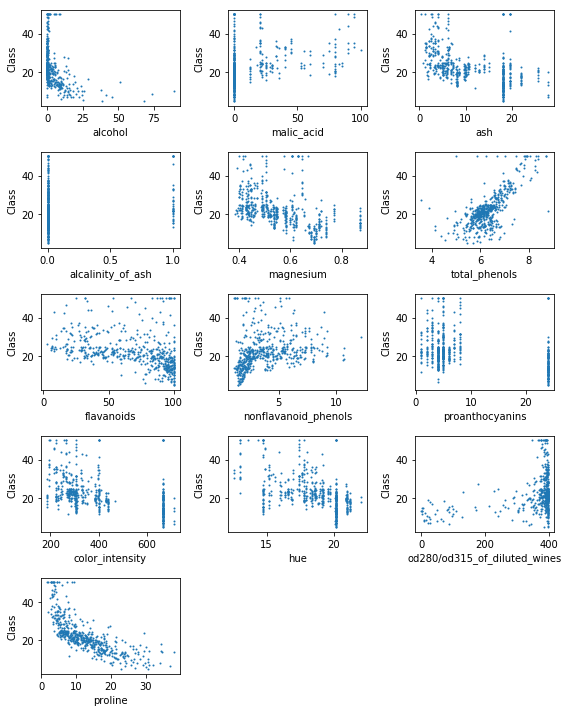

In [31]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(wine.feature_names):
  plt.subplot(5,3, i+1)
  plt.scatter(X[:, i], Y, s=1)
  plt.ylabel("Class")
  plt.xlabel(feature)
  plt.tight_layout()

In [32]:
X2 = X1[:, [0,5,7,12]] #取部分欄位

In [33]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X2, Y1, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

C:\Users\tthcy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tthcy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8333333333333334


### Logistics regression-2

In [35]:
breast_cancer = datasets.load_breast_cancer()

In [36]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [37]:
len(breast_cancer.data)

569

In [38]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size = 0.2, random_state =4)

In [39]:
len(x_train)

455

In [40]:
#驗算train筆數
569*0.8

455.20000000000005

In [42]:
len(x_test)

114

In [43]:
#驗算test筆數
569*0.2

113.80000000000001

In [44]:
# 建立模型
logireg = linear_model.LogisticRegression()

In [45]:
# 訓練模型
logireg.fit(x_train, y_train)

C:\Users\tthcy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
# 預測測試集
y_predict = logireg.predict(x_test) #x_test去推

In [47]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy: ", acc)

Accuracy:  0.9122807017543859


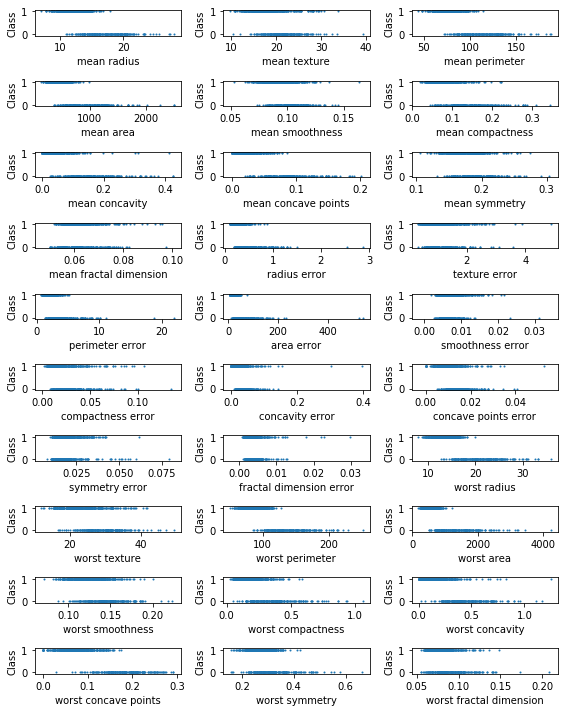

In [60]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(breast_cancer.feature_names):
  plt.subplot(10,3, i+1)
  plt.scatter(breast_cancer.data[:, i], breast_cancer.target, s=1)
  plt.ylabel("Class")
  plt.xlabel(feature)
  plt.tight_layout()

In [52]:
for i, feature in enumerate(breast_cancer.feature_names):
    print(i, feature)

0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


In [53]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')